##SUMMARY

Context

I was looking for an unused and interesting dataset to improve my data science skills on when my professor mentioned the Sloan Digital Sky Survey which offers public data of space observations. As I found the data to be super insightful I want to share the data.

Content

The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

Feature Description

The table results from a query which joins two tables (actuaclly views): "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.

To ease your start with the data you can read the feature descriptions below:
View "PhotoObj"
objid = Object Identifier
ra = J2000 Right Ascension (r-band)
dec = J2000 Declination (r-band)
Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.
u = better of DeV/Exp magnitude fit
g = better of DeV/Exp magnitude fit
r = better of DeV/Exp magnitude fit
i = better of DeV/Exp magnitude fit
z = better of DeV/Exp magnitude fit
The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

run = Run Number
rereun = Rerun Number
camcol = Camera column
field = Field number
Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:

run number, which identifies the specific scan,
the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and
the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
An additional number, rerun, specifies how the image was processed.
View "SpecObj"
specobjid = Object Identifier
class = object class (galaxy, star or quasar object)
The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

redshift = Final Redshift
plate = plate number
mjd = MJD of observation
fiberid = fiber ID
In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.
Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.
Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.
The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
space=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/Skyserver.csv')
space

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [3]:
space.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
space.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [5]:
space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [6]:
space.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [7]:
space.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

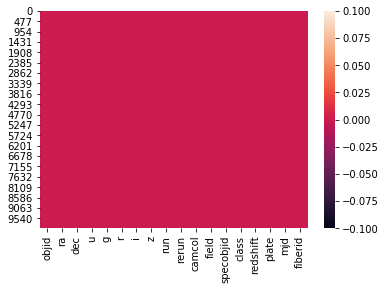

In [8]:
sns.heatmap(space.isnull())

##Univariate Analysis

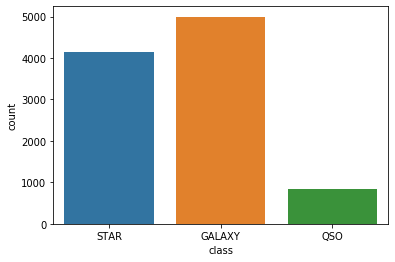

In [9]:
sns.countplot(space['class'])
#galaxy has the maximum counts in class, followed by star then QSO

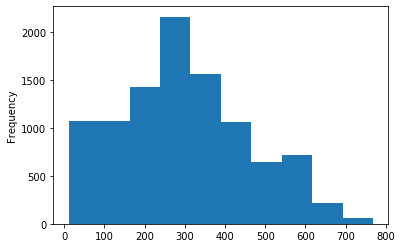

In [10]:
space['field'].plot.hist()

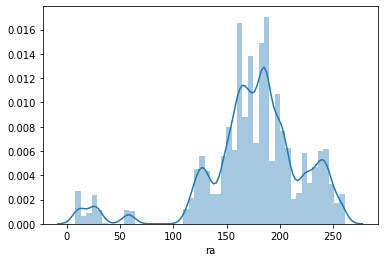

In [11]:
sns.distplot(space['ra'])

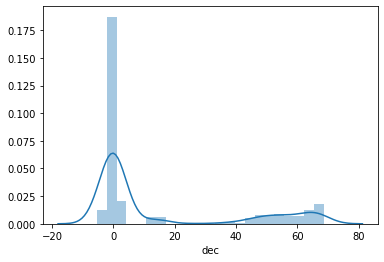

In [12]:
sns.distplot(space['dec'])

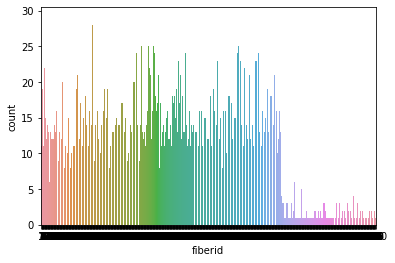

In [13]:
sns.countplot(space['fiberid'])

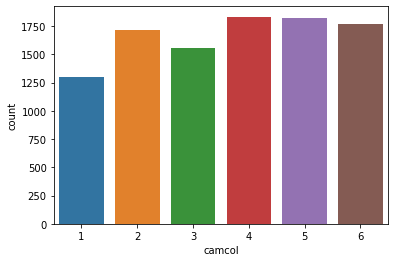

In [14]:
sns.countplot(space['camcol'])

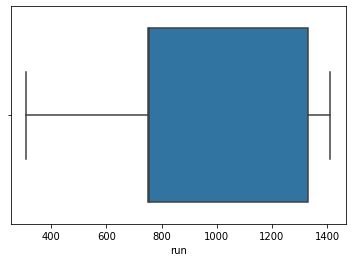

In [15]:
sns.boxplot(space['run'], data=space)

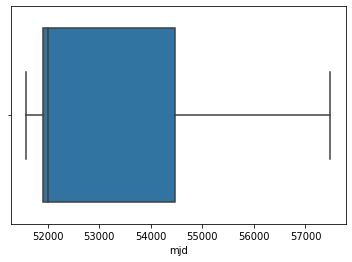

In [16]:
sns.boxplot(space['mjd'], data=space)

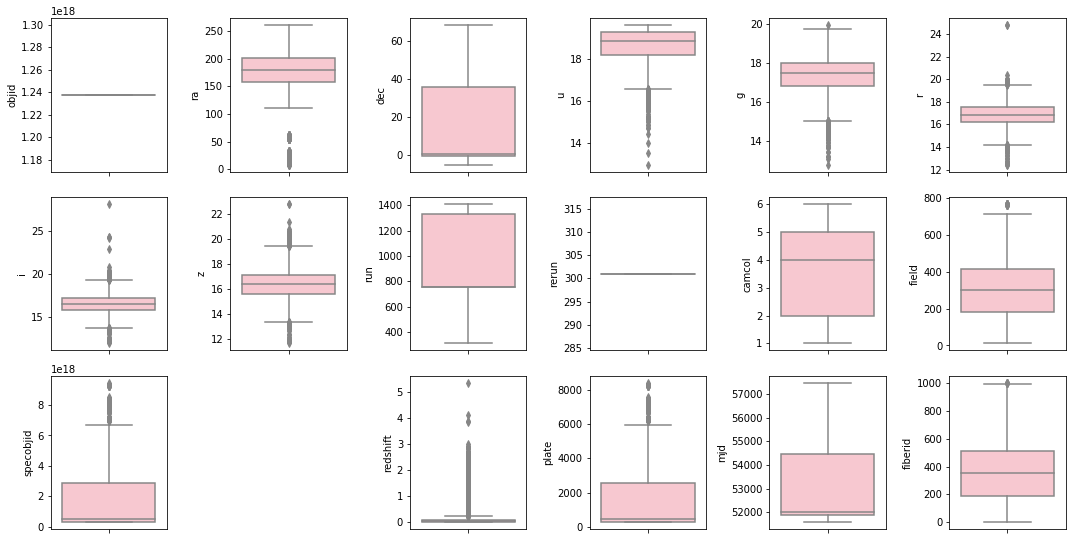

In [17]:
col_list=space.columns.values
plt.figure(figsize=(15,15))
for i in range (0,len(col_list)):
    if space[col_list[i]].dtype!='O':
        plt.subplot(6,6,i+1)
        sns.boxplot(space[col_list[i]], color='pink',orient='v')
        plt.tight_layout()

##Bivariate Analysis

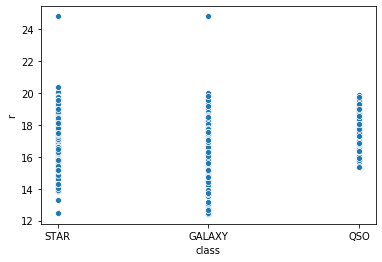

In [18]:
sns.scatterplot(x='class',y='r', data= space)

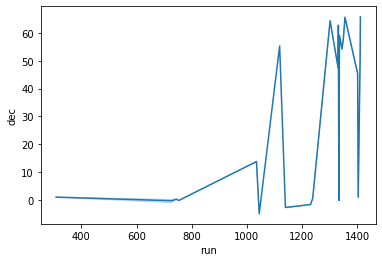

In [19]:
sns.lineplot(x='run',y='dec',data=space)

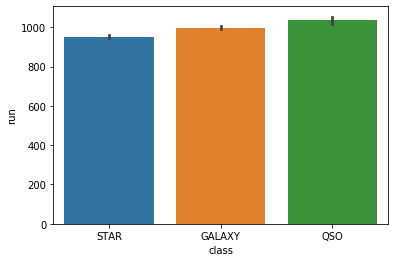

In [20]:
sns.barplot(x='class', y='run', data= space)

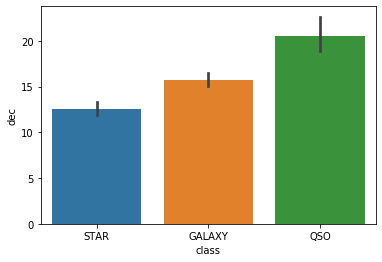

In [21]:
sns.barplot(x='class',y='dec', data= space)

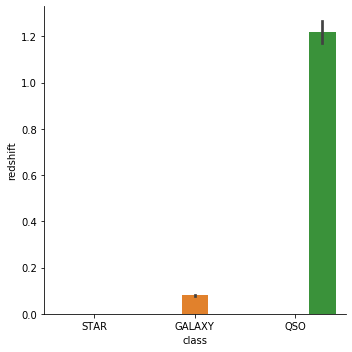

In [22]:
sns.catplot(x="class", y="redshift", hue="class", kind="bar", data=space);

##Statistical Analysis

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
space['class']=le.fit_transform(space['class'])

In [24]:
space.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,2,0.000590,3306,54922,512


In [25]:
#we need to change all the categorical values into numerical values
for i in space.columns:
    if space.columns.dtype=='O':
        space[i]=le.fit_transform(space[i])

In [26]:
space.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,10000.0,10000.00000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.0,4999.50000,4999.50000,4910.907700,4917.34390,4924.639000,4943.933400,4948.006900,7.722200,0.0,2.648700,291.067600,3570.232600,0.915400,4707.003000,139.846600,100.648600,349.69640
std,0.0,2886.89568,2886.89568,2807.465864,2826.26928,2834.939299,2849.268611,2850.775034,5.870901,0.0,1.666183,161.891705,1898.270683,0.952856,2792.511903,120.185293,77.947945,200.52238
min,0.0,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.0,2499.75000,2499.75000,2483.750000,2476.75000,2474.750000,2477.750000,2481.750000,3.000000,0.0,1.000000,173.000000,1872.750000,0.000000,2163.000000,35.000000,46.000000,185.75000
50%,0.0,4999.50000,4999.50000,4939.500000,4928.50000,4925.500000,4943.500000,4949.500000,4.000000,0.0,3.000000,288.000000,3862.500000,1.000000,4639.500000,105.000000,75.000000,350.00000
75%,0.0,7499.25000,7499.25000,7339.250000,7360.25000,7373.250000,7408.250000,7413.250000,12.000000,0.0,4.000000,403.000000,5327.000000,2.000000,7137.250000,230.000000,149.000000,509.00000
max,0.0,9999.00000,9999.00000,9729.000000,9816.00000,9851.000000,9889.000000,9895.000000,22.000000,0.0,5.000000,702.000000,6348.000000,2.000000,9636.000000,486.000000,354.000000,891.00000


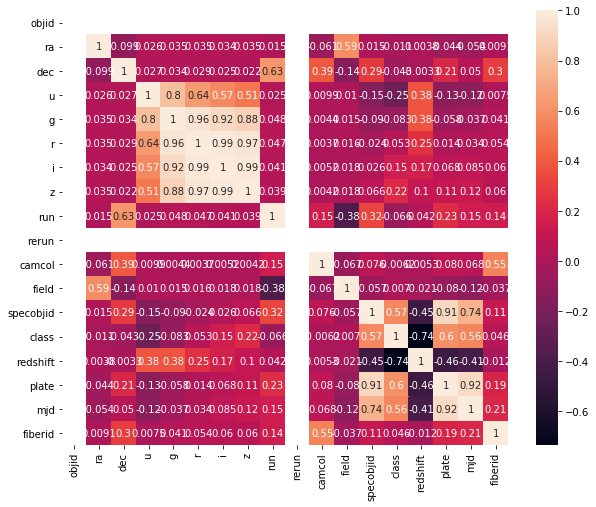

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(space.corr(), annot=True)

In [28]:
space.corr()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
objid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ra,NaN,1.000000,-0.099025,0.025992,0.034531,0.034917,0.034367,0.034826,0.015367,NaN,-0.060535,0.587106,0.015224,-0.010821,0.003844,-0.043891,-0.053590,0.009121
dec,NaN,-0.099025,1.000000,0.027279,0.033889,0.029393,0.024513,0.021956,0.625318,NaN,0.392055,-0.142701,0.287271,-0.043486,-0.003288,0.206556,0.050285,0.295278
u,NaN,0.025992,0.027279,1.000000,0.798355,0.644857,0.570774,0.507525,0.024785,NaN,0.009872,0.010133,-0.149325,-0.251365,0.381865,-0.132412,-0.117060,0.007498
g,NaN,0.034531,0.033889,0.798355,1.000000,0.959572,0.917869,0.878222,0.047607,NaN,0.004443,0.014709,-0.090095,-0.082563,0.376605,-0.057879,-0.036545,0.041139
r,NaN,0.034917,0.029393,0.644857,0.959572,1.000000,0.988125,0.969963,0.046570,NaN,0.003740,0.015729,-0.024030,0.052573,0.252699,0.014348,0.033596,0.053719
i,NaN,0.034367,0.024513,0.570774,0.917869,0.988125,1.000000,0.992448,0.041314,NaN,0.005200,0.017771,0.025687,0.146682,0.167707,0.067876,0.084789,0.059608
z,NaN,0.034826,0.021956,0.507525,0.878222,0.969963,0.992448,1.000000,0.039402,NaN,0.004185,0.018176,0.065854,0.216925,0.103689,0.108868,0.122772,0.059731
run,NaN,0.015367,0.625318,0.024785,0.047607,0.046570,0.041314,0.039402,1.000000,NaN,0.148442,-0.382701,0.323883,-0.066380,0.042437,0.232605,0.147413,0.144918
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#observations-
1. from above we can see class is positively corr with g,r,l,field,specobjib,plate,mjd,fiberid and negatively corr with rest others.
2. rerun,objid has NAN value so we can drop this column

In [29]:
space.drop(['rerun'], axis=1, inplace=True)
space.drop(['objid'], axis=1, inplace=True)

In [30]:
space.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field',
       'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

##Further Analysis of the data

In [31]:
space.groupby('class').mean()
#0=galaxy, 1= qso, 2= star


,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
class,,,,,,,,,,,,,,,
0,5020.663866,5083.709284,5491.637455,4818.950580,4445.563425,4208.360344,4025.429772,8.002601,2.654662,289.754302,2569.539616,6289.842537,72.344138,59.293117,338.620448
1,5100.769412,5416.350588,5991.652941,8690.001176,8887.980000,8909.632941,8865.844706,8.792941,2.694118,293.800000,3297.212941,9150.694118,127.903529,96.138824,376.940000
2,4953.291908,4812.794557,3990.599229,4263.444846,4689.952071,5017.524326,5256.503613,7.165462,2.632225,292.089114,4830.716763,1891.933285,223.548170,151.353805,357.451830


In [32]:
space.pivot_table(values=('redshift','z'), index='plate')

,redshift,z
plate,,
0,4867.577778,4160.355556
1,5574.836066,4438.098361
2,5926.232877,3859.698630
3,5707.101449,4500.724638
4,6142.207547,4380.641509
...,...,...
482,3554.250000,8200.500000
483,6061.666667,8032.333333
484,2654.500000,6253.000000


##Removing outliers and skewness

In [33]:
#remove outliers and skewness
print("The shape before removing outliers and skewness", space.shape)

print("skewness before removing outliers")

print(space.skew())

from scipy.stats import zscore
z=np.abs(zscore(space))
fraud=space[(z<3).all(axis=1)]
print("new shape after removing outliers", space.shape)
print("skewness after removing outliers")
print(space.skew())

The shape before removing outliers and skewness (10000, 16)
skewness before removing outliers
ra           0.000000
dec          0.000000
u           -0.021847
g           -0.006730
r            0.000088
i            0.000009
z           -0.000981
run          0.978221
camcol      -0.100220
field        0.229204
specobjid   -0.323754
class        0.169292
redshift     0.068622
plate        0.888700
mjd          1.177842
fiberid      0.150256
dtype: float64
new shape after removing outliers (10000, 16)
skewness after removing outliers
ra           0.000000
dec          0.000000
u           -0.021847
g           -0.006730
r            0.000088
i            0.000009
z           -0.000981
run          0.978221
camcol      -0.100220
field        0.229204
specobjid   -0.323754
class        0.169292
redshift     0.068622
plate        0.888700
mjd          1.177842
fiberid      0.150256
dtype: float64


In [34]:
#reducing skewness using sqrt function
for col in space.columns:
    if space.skew().loc[col]>0.55:
        space[col]=np.sqrt(space[col])

In [35]:
space.skew()

ra           0.000000
dec          0.000000
u           -0.021847
g           -0.006730
r            0.000088
i            0.000009
z           -0.000981
run          0.677337
camcol      -0.100220
field        0.229204
specobjid   -0.323754
class        0.169292
redshift     0.068622
plate        0.119126
mjd          0.256970
fiberid      0.150256
dtype: float64

In [36]:
#further little reducing skewness using log1p function
for col in space.columns:
    if space.skew().loc[col]>0.55:
        space[col]=np.log1p(space[col])

In [37]:
space.skew()

ra           0.000000
dec          0.000000
u           -0.021847
g           -0.006730
r            0.000088
i            0.000009
z           -0.000981
run          0.213035
camcol      -0.100220
field        0.229204
specobjid   -0.323754
class        0.169292
redshift     0.068622
plate        0.119126
mjd          0.256970
fiberid      0.150256
dtype: float64

##Splitting the data into target and input

In [38]:
space.rename(columns={'class':'cls'}, inplace=True)
#as class won't work, so chnge the name to cls

In [39]:
space.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,cls,redshift,plate,mjd,fiberid
0,5378,4030,8818,3143,1853,1594,1474,1.005053,3,256,5641,2,1681,16.340135,13.490738,490
1,5392,4145,4066,3722,4220,4703,4956,1.005053,3,256,2267,2,1437,7.000000,2.449490,540
2,5405,4118,8203,8155,7210,6793,6350,1.005053,3,257,1289,0,8222,4.582576,8.944272,512
3,5458,3910,1569,1960,2431,2897,3415,1.005053,3,258,5642,2,1162,16.340135,13.490738,509
4,5462,4064,1206,1255,3347,4943,5701,1.005053,3,258,5642,2,3501,16.340135,13.490738,511


In [40]:
x=space.drop('cls', axis=1)
x.head()
y=pd.DataFrame(space.cls)
y.head()

,cls
0,2
1,2
2,0
3,2
4,2


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.537854,0.403040,0.906362,0.320192,0.188103,0.161189,0.148964,0.578021,0.6,0.364672,0.888626,0.174450,0.741204,0.717025,0.549944
1,0.539254,0.414541,0.417926,0.379177,0.428383,0.475579,0.500859,0.578021,0.6,0.364672,0.357120,0.149128,0.317526,0.130189,0.606061
2,0.540554,0.411841,0.843149,0.830786,0.731905,0.686925,0.641738,0.578021,0.6,0.366097,0.203056,0.853259,0.207870,0.475383,0.574635
3,0.545855,0.391039,0.161270,0.199674,0.246777,0.292952,0.345124,0.578021,0.6,0.367521,0.888784,0.120589,0.741204,0.717025,0.571268
4,0.546255,0.406441,0.123959,0.127852,0.339762,0.499848,0.576150,0.578021,0.6,0.367521,0.888784,0.363325,0.741204,0.717025,0.573513


##Importing necessary libraries

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

##Finding out the best random_state

In [43]:
def max_accuracy(reg,x,y):
    max_acc_score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        acc_score=accuracy_score(test_y,pred)
        print("The accuracy score achieved at r state", r_state, "is", acc_score)
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy", max_acc_score, "is achieved at random state", final_r_state)
    return max_acc_score

In [44]:
#Finalising the train test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=59,test_size=0.20)

In [45]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(8000, 15)
(8000, 1)
(2000, 15)
(2000, 1)


In [46]:
#Let us use the other classification models and for the same let us use GridSearchCV to bring out the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x,train_y)
gddt.best_params_

{'criterion': 'gini', 'splitter': 'best'}

In [47]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x,train_y)
gdsv.best_params_

{'C': 10, 'kernel': 'linear'}

In [48]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x,train_y)
gdkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}

In [50]:
#After obtaining best parameters, we should now check the models
score=[]
cv=[]
rocscore=[]

from sklearn.metrics import auc, roc_auc_score, roc_curve

algorithms=[KNeighborsClassifier(algorithm='auto', n_neighbors= 5, weights='distance'), DecisionTreeClassifier(criterion= 'entropy', splitter= 'best'), SVC(C=10, kernel='linear'),MultinomialNB()]

for i in algorithms:
    print(i)
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    accscore=accuracy_score(test_y,pred)
    score.append(accscore)
    print("")
    print("The accuracy score is ", accscore)
    print("")
    cvscore=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y,pred))
    print()
    cm=confusion_matrix(test_y,pred)
    print(cm)
    print()
   
    

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

The accuracy score is  0.9755

The cross val score is 0.9608000000000001

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1017
           1       0.99      0.95      0.97       164
           2       0.98      0.97      0.98       819

    accuracy                           0.98      2000
   macro avg       0.98      0.97      0.97      2000
weighted avg       0.98      0.98      0.98      2000


[[999   2  16]
 [  8 155   1]
 [ 22   0 797]]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
            

In [51]:
result=pd.DataFrame({'Model':[KNeighborsClassifier, DecisionTreeClassifier, SVC, MultinomialNB],'Accuracy_Score':score,'Cross_val_score':cv})
result

,Model,Accuracy_Score,Cross_val_score
0,<class 'sklearn.neighbors._classification.KNei...,0.9755,0.9608
1,<class 'sklearn.tree._classes.DecisionTreeClas...,0.9880,0.9865
2,<class 'sklearn.svm._classes.SVC'>,0.9920,0.9850
3,<class 'sklearn.naive_bayes.MultinomialNB'>,0.8500,0.8407


In [52]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=90,test_size=0.20)
dt=DecisionTreeClassifier(criterion= 'entropy', splitter= 'best')
dt.fit(train_x,train_y)
pred=dt.predict(test_x)
acs=accuracy_score(test_y,pred)
print("The accuracy score is", acs)
cs=cross_val_score(sv,x,y,cv=5).mean()
print("The cross val score is", cs)
pd.DataFrame(pred).to_csv("space.csv")

The accuracy score is 0.987
The cross val score is 0.9819000000000001


In [54]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=90,test_size=0.20)
sv=SVC(C=10, kernel='linear')
sv.fit(train_x,train_y)
pred=dt.predict(test_x)
acs=accuracy_score(test_y,pred)
print("The accuracy score is", acs)
cs=cross_val_score(sv,x,y,cv=5).mean()
print("The cross val score is", cs)
pd.DataFrame(pred).to_csv("space.csv")

The accuracy score is 0.987
The cross val score is 0.985


#by seeing above result we can see that SVC is the best model for this dataset.

In [56]:
from sklearn.externals import joblib
joblib.dump(sv,"space.pkl")

['space.pkl']